In [1]:
import numpy as np
import matplotlib.pyplot as plt

size=100
total_x = np.linspace(0, size, size)
np.random.shuffle(total_x)
init_w = np.random.randint(5, size=1)
init_b = np.random.normal(2, 30, (size, ))
total_y = total_x * init_w + init_b

print("init_w={0}, init_b={1}".format(init_w, init_b.sum()/len(init_b)))
print("first 20 elements of \nx: {0} \r\ny: {1}".format(total_x[:20], total_y[:20]))
batch_size=30
train_x = total_x[:batch_size]
train_y = total_y[:batch_size]

loop=5
w=0
b=0
rate=0.0001
N = len(train_y)

init_w=[1], init_b=2.538924076447042
first 20 elements of 
x: [ 13.13131313  98.98989899  68.68686869   2.02020202  17.17171717
  78.78787879  97.97979798  73.73737374   5.05050505  33.33333333
  74.74747475  21.21212121  75.75757576  43.43434343  47.47474747
  35.35353535 100.          23.23232323  71.71717172  94.94949495] 
y: [ -3.13421424 119.39809485 100.4930959   10.92663721  61.8883654
  79.50606049 119.66362304 109.41515282  16.13640223 -17.56700929
  57.08295769  36.72095964  40.39399882  29.74034962 103.49049872
  30.72772205 168.03696403  -6.69522189  94.46435879  42.1481536 ]


w:1.102829380013793, b:0.01595405360513678, loss:847


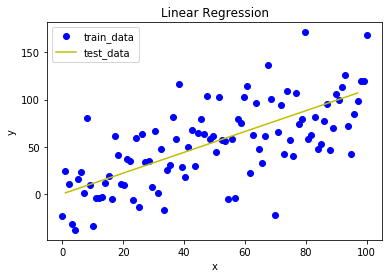

In [2]:
loss = 0
for i in range(loop):
    pred_y = w * train_x + b
    loss = ((train_y - pred_y) ** 2 / N).sum().astype(int)
    gradient_w = ((pred_y - train_y) * train_x * 2 / N).sum()#f'(w)=2/N*x*(wx+b-y)
    gradient_b = ((pred_y - train_y) * 2 / N).sum()#f'(b)=2/N*(wx+b-y)
#     print("loss={0}, w={1}, gradient_w={2}, b={3}, gradient_b={4}".format(loss, w, gradient_w, b, gradient_b))
    w = w - (rate * gradient_w)
    b = b - (rate * gradient_b)
print("w:{0}, b:{1}, loss:{2}".format(w, b, loss))

test_y = w * train_x + b

min_x = min(total_x[batch_size:])
max_x = max(total_x[batch_size:])
result_x = np.array([min_x, max_x])
result_y = np.array([w * min_x + b, w * max_x + b])
    
plt.plot(total_x, total_y, 'bo', label='train_data')
plt.plot(result_x, result_y, 'y', label='test_data')

plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

In [3]:
import keras
from keras import models
from keras import layers
from keras import optimizers

network = models.Sequential()
network.add(layers.Dense(1, activation='linear', input_shape=(1,)))

opt = optimizers.SGD(lr=rate)
network.compile(optimizer=opt,
                loss='mse',
                metrics=['accuracy'])
network.fit(train_x, train_y, epochs=loop, batch_size=10)
W,b = network.layers[0].get_weights()
print("w:{0}, b:{1}".format(W, b))


/DevTools/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/5
30/30 [==============================] - 0s 7ms/step - loss: 873.6900 - acc: 0.0000e+00
Epoch 2/5
30/30 [==============================] - 0s 222us/step - loss: 847.6159 - acc: 0.0000e+00
Epoch 3/5
30/30 [==============================] - 0s 404us/step - loss: 866.4401 - acc: 0.0000e+00
Epoch 4/5
30/30 [==============================] - 0s 616us/step - loss: 938.0233 - acc: 0.0000e+00
Epoch 5/5
30/30 [==============================] - 0s 640us/step - loss: 867.4041 - acc: 0.0000e+00
w:[[1.2354052]], b:[0.00085494]


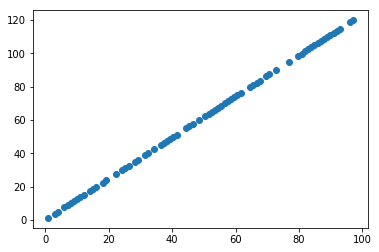

In [4]:
x_test = total_x[batch_size:]

y_pred = network.predict(x_test)
plt.scatter(x_test, y_pred)
# plt.plot(x_test, y_pred)
plt.show()

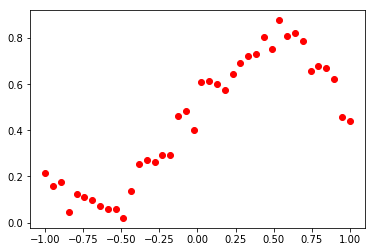

In [5]:
size=40
x = np.linspace(-1.0, 1.0, size)
test_x = x
np.random.shuffle(x)
w = [-0.8, -0.2, 0.9, 0.5]
def generateY(w, x):
    result = np.zeros(x.shape)
    size = len(w)
    for i in reversed(range(size)):
        result += (w[size - i - 1] * (x ** i))
    return result
y = generateY(w, x)
y += np.random.uniform(-0.09, 0.09, y.shape)

plt.plot(x, y, 'ro')
# plt.plot(x_test, y_pred)
plt.show()

Epoch 1/20
40/40 [==============================] - 0s 8ms/step - loss: 0.2522 - acc: 0.0000e+00
Epoch 2/20
40/40 [==============================] - 0s 677us/step - loss: 0.1940 - acc: 0.0000e+00
Epoch 3/20
40/40 [==============================] - 0s 404us/step - loss: 0.1508 - acc: 0.0000e+00
Epoch 4/20
40/40 [==============================] - 0s 666us/step - loss: 0.1184 - acc: 0.0000e+00
Epoch 5/20
40/40 [==============================] - 0s 234us/step - loss: 0.0942 - acc: 0.0000e+00
Epoch 6/20
40/40 [==============================] - 0s 843us/step - loss: 0.0761 - acc: 0.0000e+00
Epoch 7/20
40/40 [==============================] - 0s 500us/step - loss: 0.0623 - acc: 0.0000e+00
Epoch 8/20
40/40 [==============================] - 0s 822us/step - loss: 0.0521 - acc: 0.0000e+00
Epoch 9/20
40/40 [==============================] - 0s 404us/step - loss: 0.0442 - acc: 0.0000e+00
Epoch 10/20
40/40 [==============================] - 0s 910us/step - loss: 0.0382 - acc: 0.0000e+00
Epoch 11/20

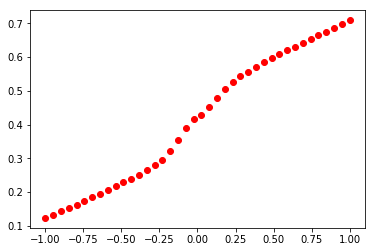

In [13]:
x = x.reshape(len(x), 1)

network2 = models.Sequential()
network2.add(layers.Dense(64, activation='relu', input_shape=(1,)))
# network2.add(layers.Dense(units=200, input_dim=1))
# network2.add(layers.Activation('relu'))
# network2.add(layers.Dense(units=45))
# network2.add(layers.Activation('relu'))
network2.add(layers.Dense(1))

network2.compile(optimizer='sgd',
                loss='mse',
                metrics=['accuracy'])
network2.fit(x, y, epochs=20, batch_size=10)
result = network2.predict(test_x, batch_size=10)

plt.plot(test_x, result, 'ro')
plt.show()